# Econ 441B Week 9 Assignment
# Richard Grigorian (UID: 505-088-797)

## 0. Import and Clean Data.

In [12]:
# Imports
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# drive.mount('/content/gdrive/', force_remount = True)

In [2]:
# Load Data
df = pd.read_csv("Country-data.csv", sep = ",")

In [3]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [5]:
# Clean Data
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [6]:
# Scale Data
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

## 1. Fit a kmeans Model with any Number of Clusters.

To begin with, we simply fit a kmeans model with 5 clusters.

In [13]:
# Fitting with 5 Clusters
kmeans = KMeans(n_clusters= 5,
                 random_state=42
                 ).fit(X_scaled)

## 2. Pick two features to visualize across.

In [14]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

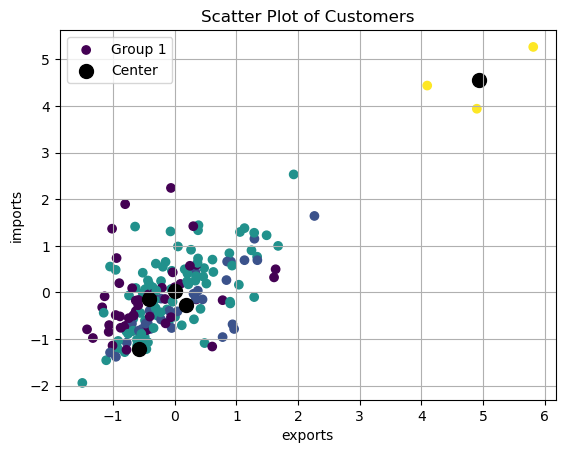

In [15]:
# Import vs. Export Visualization
x1_index = 1
x2_index = 3


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index],
            c=kmeans.labels_,
            cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index],
             marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

## 3. Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means.
 

In [16]:
# Loop to get WCSS
WCSS = []
Ks = range(1,15)
for k in Ks:
    kmeans = KMeans(n_clusters=k, n_init=30, init='random')
    kmeans.fit(X_scaled)
    WCSS.append(kmeans.inertia_)

## 4. Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

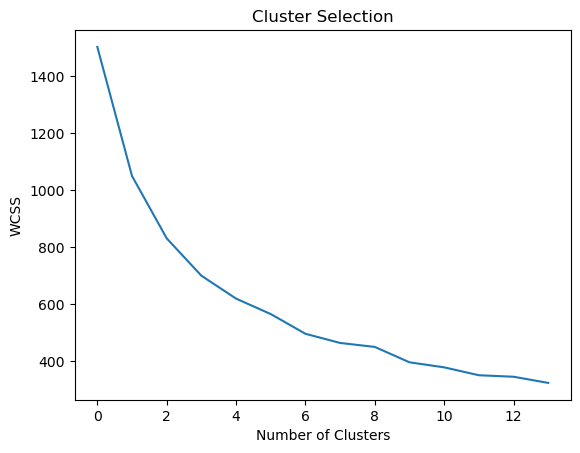

In [17]:
# Plot WCSS Against Clusters
plt.plot(WCSS)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Cluster Selection")
plt.show()

The above graph shows decreasing WCSS as we increase the number of clusters. This is unsurprising considering the nature of the Elbow Method and WCSS. However, using economic intuition, we will move forward with $k = 6$ clusters. The idea being that there are 6 continents (that have countries in them) and therefore we may expect there to be natural clustering based on the geographic location.

Namely, we expect the North America region and perhaps Europe to have more Imports than Exports (trade deficit) and Asia to have more Exports than Imports (trade surplus).

In [18]:
# Number of Clusters
k = 6 # Major Continents

We fit the model and predict in the next section.

## 5. Create a list of the countries that are in each cluster. Write interesting things you notice.

In [19]:
# Run the Model with k = 6 Clusters
kmeans = KMeans(n_clusters=k, 
                n_init=30, 
                init="random"
                ).fit(X_scaled).predict(X_scaled)

In [22]:
# Store results in Data Frame
preds =  pd.DataFrame(kmeans)

# Append with Features & Country Names
output = pd.concat([preds, X, names], axis=1)

In [25]:
output.head(10)

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,1,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,Afghanistan
1,2,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,Albania
2,4,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Algeria
3,1,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,Angola
4,2,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,Antigua and Barbuda
5,2,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,Argentina
6,2,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,Armenia
7,0,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,Australia
8,0,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,Austria
9,4,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,Azerbaijan


In [37]:
# List of Countries in Each Cluster
Cluster1 = list(output[output[0] == 0]["country"]) # Cluster 1
Cluster2 = list(output[output[0] == 1]["country"]) # Cluster 2
Cluster3 = list(output[output[0] == 2]["country"]) # Cluster 3
Cluster4 = list(output[output[0] == 3]["country"]) # Cluster 4
Cluster5 = list(output[output[0] == 4]["country"]) # Cluster 5
Cluster6 = list(output[output[0] == 5]["country"]) # Cluster 6

print("Cluster 1: ", Cluster1)
print("Cluster 2: ", Cluster2)
print("Cluster 3: ", Cluster3)
print("Cluster 4: ", Cluster4)
print("Cluster 5: ", Cluster5)
print("Cluster 6: ", Cluster6)

Cluster 1:  ['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']
Cluster 2:  ['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Gambia', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kiribati', 'Lesotho', 'Liberia', 'Malawi', 'Mali', 'Micronesia, Fed. Sts.', 'Mozambique', 'Namibia', 'Niger', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Tanzania', 'Togo', 'Uganda', 'Zambia']
Cluster 3:  ['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodi

Right off the bat, we notice that the clusters are **not** by continent as we might have hoped. We know to be true since Australia is not in a cluster all by itself and Nigeria is. Hence, that initial intutition was incorrect and it doesn't seem that continent is strictly the correct clustering.

Beyond this, we notice that **Cluster 1** is mostly comprised of wealth countries. Namely, most of these countries are in Europe or North America (e.g., Austria, Canada, France, Germany, United States). However, not all of these countries traditionally run a trade deficit. Namely, Germany typically runs a Trade Surplus. However, otherwise, the cluster does seem to capture countries that mostly run a trade deficit.

All of the other clusters seem to be mostly developping countires, and obvious relationships don't seem to be present.

## 6. Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interpretation.

In [38]:
# Concat Data Frame
Q6DF = pd.concat([preds, X], axis=1)

In [39]:
# Feature Means Across Clusters
Q6DF.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,4.982759,45.703448,9.245862,39.513793,45762.068966,2.727793,80.386207,1.814828,44065.517241
1,97.455882,27.003529,7.382059,47.420588,2607.147059,7.204559,57.273529,5.083235,1357.058824
2,16.383824,44.085294,6.603235,51.333824,14862.941176,5.435750,74.211765,2.111471,8213.911765
3,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000
4,52.393750,33.455594,4.519687,34.198934,7484.062500,15.452188,67.284375,3.540313,3356.187500
5,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


In [40]:
# Feature St. Devs. Across Clusters
Q6DF.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,2.191227,22.110332,3.296145,17.720604,19932.178108,4.341140,1.464758,0.359778,14752.173590
1,36.772620,13.406179,2.839025,19.568509,2968.507452,5.615303,6.309267,1.143982,1714.401476
2,9.145958,19.169529,1.856367,18.701334,9185.985604,5.023133,3.233294,0.656136,5757.320111
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23.768398,21.775472,1.626382,14.813079,6959.903067,9.720013,4.187162,1.105016,3822.899478
5,2.309401,23.515952,2.492877,16.165808,32460.642836,2.179718,1.205543,0.240624,43011.665084


## 7. Write an observation about the descriptive statistics.

The first thing we notice about our descriptive statistics is that for cluster 1 (denoted by index 0 above), the Exports exceed the Imports. This implies, that on average, cluster 1 runs a trade surplus. This is counter to our intutition that many of these developped countries would run a trade deficit to take advantage of cheaper production in developping countires. However, the standard deviation for both exports and imports is quite large so it is possible that the mean here is a bit misleading.

Additionally, we notice that Cluster 2 and 3 seem to be running a trade deficit. These clusters are mainly very poor countries (as seen by the averge GDP). In these cases, we see that these countries are likely not industrialized and selling goods to the rest of the world; rather, they might lack the resources to produce for themselves and thus buy from the rest of the world.

It seems that for our purposes, it may have been better to use 2 clusters to capture the developped vs. developping country dynamic better. Currently, we do not seem to be getting a lot of value out of the additional clusters for answering this question about Trade Balance.